In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_train_thres_10.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_train_thres_10.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_valid_thres_10.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_valid_thres_10.npy')
X_test = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_test_thres_10.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_test_thres_10.npy')

"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [5]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [6]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)

In [8]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)

Training model...
Train on 1178 samples, validate on 700 samples
Epoch 1/100
1178/1178 [==============================] - 0s - loss: 1.0967 - val_loss: 0.6062
Epoch 0: validation loss: 0.606
Balanced Accuracy: 67.00%	 auROC: 0.736	 auPRC: 0.748	 auPRG: 0.471
Recall at 5%|10%|20% FDR: 8.0%|22.6%|38.9%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 2/100
1178/1178 [==============================] - 0s - loss: 1.0788 - val_loss: 0.6048
Epoch 1: validation loss: 0.605
Balanced Accuracy: 67.43%	 auROC: 0.741	 auPRC: 0.752	 auPRG: 0.483
Recall at 5%|10%|20% FDR: 8.0%|22.3%|31.4%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 3/100
1178/1178 [==============================] - 0s - loss: 1.0645 - val_loss: 0.6019
Epoch 2: validation loss: 0.602
Balanced Accuracy: 68.71%	 auROC: 0.746	 auPRC: 0.756	 auPRG: 0.502
Recall at 5%|10%|20% FDR: 7.1%|21.7%|31.7%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 4/100
1178/1178 [==============================] - 0s - loss: 1.0410 - val_loss: 0.6007
E

In [9]:
print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))

Balanced Accuracy: 69.20%	 auROC: 0.764	 auPRC: 0.771	 auPRG: 0.538
Recall at 5%|10%|20% FDR: 4.5%|9.4%|51.3%	 Num Positives: 224	 Num Negatives: 224	 


In [10]:
print(dnn_normalized.test(X_train_normalized[:, :, :10:, :], y_train))

Balanced Accuracy: 82.60%	 auROC: 0.913	 auPRC: 0.922	 auPRG: 0.865
Recall at 5%|10%|20% FDR: 63.7%|73.7%|86.1%	 Num Positives: 589	 Num Negatives: 589	 


In [11]:
print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))

Balanced Accuracy: 69.00%	 auROC: 0.777	 auPRC: 0.790	 auPRG: 0.561
Recall at 5%|10%|20% FDR: 6.6%|31.4%|53.1%	 Num Positives: 350	 Num Negatives: 350	 


In [12]:
pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [13]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)

In [14]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)

Training model...
Train on 1178 samples, validate on 700 samples
Epoch 1/100
1178/1178 [==============================] - 0s - loss: 1.4485 - val_loss: 0.7005
Epoch 0: validation loss: 0.701
Balanced Accuracy: 48.14%	 auROC: 0.503	 auPRC: 0.527	 auPRG: -0.056
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 2/100
1178/1178 [==============================] - 0s - loss: 1.3940 - val_loss: 0.6935
Epoch 1: validation loss: 0.693
Balanced Accuracy: 51.14%	 auROC: 0.550	 auPRC: 0.552	 auPRG: 0.083
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 3/100
1178/1178 [==============================] - 0s - loss: 1.3584 - val_loss: 0.6807
Epoch 2: validation loss: 0.681
Balanced Accuracy: 56.86%	 auROC: 0.598	 auPRC: 0.587	 auPRG: 0.174
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 4/100
1178/1178 [==============================] - 0s - loss: 1.3246 - val_loss: 0.6718
Epoch 

In [15]:
print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))

Balanced Accuracy: 71.21%	 auROC: 0.790	 auPRC: 0.790	 auPRG: 0.597
Recall at 5%|10%|20% FDR: 2.2%|19.2%|57.1%	 Num Positives: 224	 Num Negatives: 224	 


# with distance only

In [16]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [17]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 1178 samples, validate on 700 samples
Epoch 1/100
1178/1178 [==============================] - 0s - loss: 1.3633 - val_loss: 0.6834
Epoch 0: validation loss: 0.683
Balanced Accuracy: 57.43%	 auROC: 0.582	 auPRC: 0.550	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 2/100
1178/1178 [==============================] - 0s - loss: 1.3558 - val_loss: 0.6867
Epoch 1: validation loss: 0.687
Balanced Accuracy: 57.57%	 auROC: 0.582	 auPRC: 0.551	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 3/100
1178/1178 [==============================] - 0s - loss: 1.3532 - val_loss: 0.6853
Epoch 2: validation loss: 0.685
Balanced Accuracy: 57.57%	 auROC: 0.582	 auPRC: 0.551	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 350	 Num Negatives: 350	 

Epoch 4/100
1178/1178 [==============================] - 0s - loss: 1.3541 - val_loss: 0.6853
Epoch 3

In [18]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

Balanced Accuracy: 58.93%	 auROC: 0.601	 auPRC: 0.566	 auPRG: 0.189
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 224	 Num Negatives: 224	 


# Print prediction

In [20]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [21]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [22]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [23]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


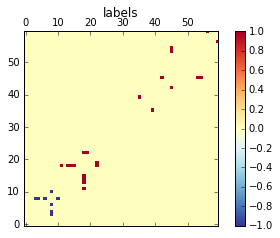

0.9769500494
(60, 60)
Limit: 0.9769500494


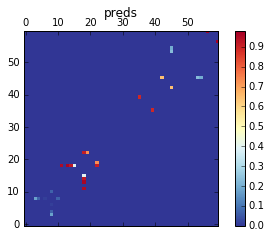

In [24]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )